In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns

# Importando os dados

In [2]:
df = pd.read_excel('Dados_Mchl_dia.xlsx', skiprows=10)
df.head()

Data Medicao  PRECIPITACAO TOTAL, DIARIO (AUT)(mm)  \
0   2006-11-19                                   5.4   
1   2006-11-20                                   7.0   
2   2006-11-21                                   0.0   
3   2006-11-22                                   0.0   
4   2006-11-23                                   0.0   

   PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB)  \
0                                  965.920833   
1                                  967.341667   
2                                  967.133333   
3                                  965.954167   
4                                  964.170833   

   TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(Â°C)  \
0                                          20.045833         
1                                          17.900000         
2                                          17.712500         
3                                          18.441667         
4                                          17.641667         

   TEMPERATURA MAXIMA, DIARIA (AUT)(Â°C)  \
0                                   27.7   
1                                   22.7   
2                                   30.6   
3                                   32.7   
4                                   35.0   

   TEMPERATURA MEDIA, DIARIA (AUT)(Â°C)  \
0                             22.545833   
1                             19.566667   
2                             22.125000   
3                             25.712500   
4                             27.095833   

   TEMPERATURA MINIMA, DIARIA (AUT)(Â°C)  \
0                                   21.3   
1                                   18.5   
2                                   14.3   
3                                   19.2   
4                                   19.1   

   UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)  \
0                                      86.125000   
1                                      90.416667   
2                                      78.750000   
3                                      67.541667   
4                                      58.541667   

   UMIDADE RELATIVA DO AR, MINIMA DIARIA (AUT)(%)  \
0                                            67.0   
1                                            73.0   
2                                            47.0   
3                                            33.0   
4                                            31.0   

   VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)  \
0                                    10.0   
1                                    10.0   
2                                     9.4   
3                                     6.9   
4                                     8.6   

   VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)  Chuva amanhã  
0                                   3.983333             1  
1                                   3.725000             0  
2                                   2.608333             0  
3                                   2.150000             0  
4                                   2.966667             0

In [3]:
# Verificando os dtypes
df.dtypes

Data Medicao                                               datetime64[ns]
PRECIPITACAO TOTAL, DIARIO (AUT)(mm)                              float64
PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB)                        float64
TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(Â°C)           float64
TEMPERATURA MAXIMA, DIARIA (AUT)(Â°C)                             float64
TEMPERATURA MEDIA, DIARIA (AUT)(Â°C)                              float64
TEMPERATURA MINIMA, DIARIA (AUT)(Â°C)                             float64
UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)                     float64
UMIDADE RELATIVA DO AR, MINIMA DIARIA (AUT)(%)                    float64
VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)                            float64
VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)                         float64
Chuva amanhã                                                        int64
dtype: object

In [4]:
# Setando índice
df = df.set_index('Data Medicao')

In [5]:
# Verificando valores faltantes
100*(df.isnull().sum()/len(df))

PRECIPITACAO TOTAL, DIARIO (AUT)(mm)                       7.758466
PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB)                 6.092098
TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(Â°C)    6.145852
TEMPERATURA MAXIMA, DIARIA (AUT)(Â°C)                      5.554560
TEMPERATURA MEDIA, DIARIA (AUT)(Â°C)                       6.987995
TEMPERATURA MINIMA, DIARIA (AUT)(Â°C)                      5.357463
UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)              4.139043
UMIDADE RELATIVA DO AR, MINIMA DIARIA (AUT)(%)             1.558860
VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)                     1.576778
VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)                  6.092098
Chuva amanhã                                               0.000000
dtype: float64

In [6]:
# Dropando os faltantes de chuva
df = df.dropna(axis=0, subset=['PRECIPITACAO TOTAL, DIARIO (AUT)(mm)'])

In [7]:
# Verificando valores faltantes
100*(df.isnull().sum()/len(df))

PRECIPITACAO TOTAL, DIARIO (AUT)(mm)                       0.000000
PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB)                 0.058275
TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(Â°C)    0.116550
TEMPERATURA MAXIMA, DIARIA (AUT)(Â°C)                      0.000000
TEMPERATURA MEDIA, DIARIA (AUT)(Â°C)                       0.233100
TEMPERATURA MINIMA, DIARIA (AUT)(Â°C)                      0.000000
UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)              0.000000
UMIDADE RELATIVA DO AR, MINIMA DIARIA (AUT)(%)             0.000000
VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)                     0.000000
VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)                  0.058275
Chuva amanhã                                               0.000000
dtype: float64

In [8]:
# Interpolando os demais valores
df = df.interpolate(method='time', limit_direction='forward')

In [9]:
# Verificando valores faltantes
100*(df.isnull().sum()/len(df))

PRECIPITACAO TOTAL, DIARIO (AUT)(mm)                       0.0
PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB)                 0.0
TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(Â°C)    0.0
TEMPERATURA MAXIMA, DIARIA (AUT)(Â°C)                      0.0
TEMPERATURA MEDIA, DIARIA (AUT)(Â°C)                       0.0
TEMPERATURA MINIMA, DIARIA (AUT)(Â°C)                      0.0
UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)              0.0
UMIDADE RELATIVA DO AR, MINIMA DIARIA (AUT)(%)             0.0
VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)                     0.0
VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)                  0.0
Chuva amanhã                                               0.0
dtype: float64

In [10]:
columns = list(df.columns)
max_values = []
min_values = []

for col in columns:
    mini = df[col].min()
    maxi = df[col].max()
    max_values.append(maxi)
    min_values.append(mini)
    
for nome, maxi, mini in zip(columns, max_values, min_values):
        print('A variável {} possui valor máximo {} e valor mínimo {}'.format(nome, maxi, mini))

A variável PRECIPITACAO TOTAL, DIARIO (AUT)(mm) possui valor máximo 127.6 e valor mínimo 0.0
A variável PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB) possui valor máximo 982.1375 e valor mínimo 956.779167
A variável TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(Â°C) possui valor máximo 24.041667 e valor mínimo -2.495833
A variável TEMPERATURA MAXIMA, DIARIA (AUT)(Â°C) possui valor máximo 40.1 e valor mínimo 9.0
A variável TEMPERATURA MEDIA, DIARIA (AUT)(Â°C) possui valor máximo 31.595833 e valor mínimo 4.95
A variável TEMPERATURA MINIMA, DIARIA (AUT)(Â°C) possui valor máximo 25.3 e valor mínimo -2.4
A variável UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%) possui valor máximo 97.875 e valor mínimo 27.333333
A variável UMIDADE RELATIVA DO AR, MINIMA DIARIA (AUT)(%) possui valor máximo 96.0 e valor mínimo 9.0
A variável VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s) possui valor máximo 34.6 e valor mínimo 0.0
A variável VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s) possui valor máximo 8.7375 e valo

# Análise exploratória dos dados

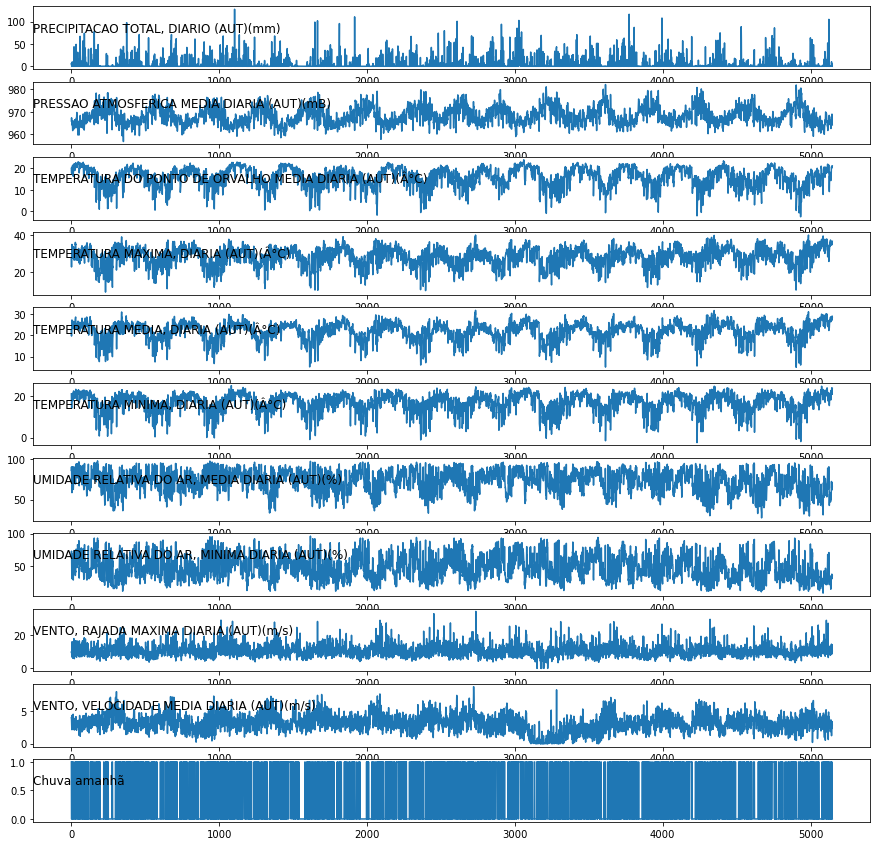

In [11]:
# Visualizando 
values = df.values
groups = [0,1,2,3,4,5,6,7,8,9,10]
i = 1

plt.figure(figsize=(15,15))
              
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(values[:, group])
	plt.title(df.columns[group], y=0.5, loc='left')
	i += 1
plt.show()

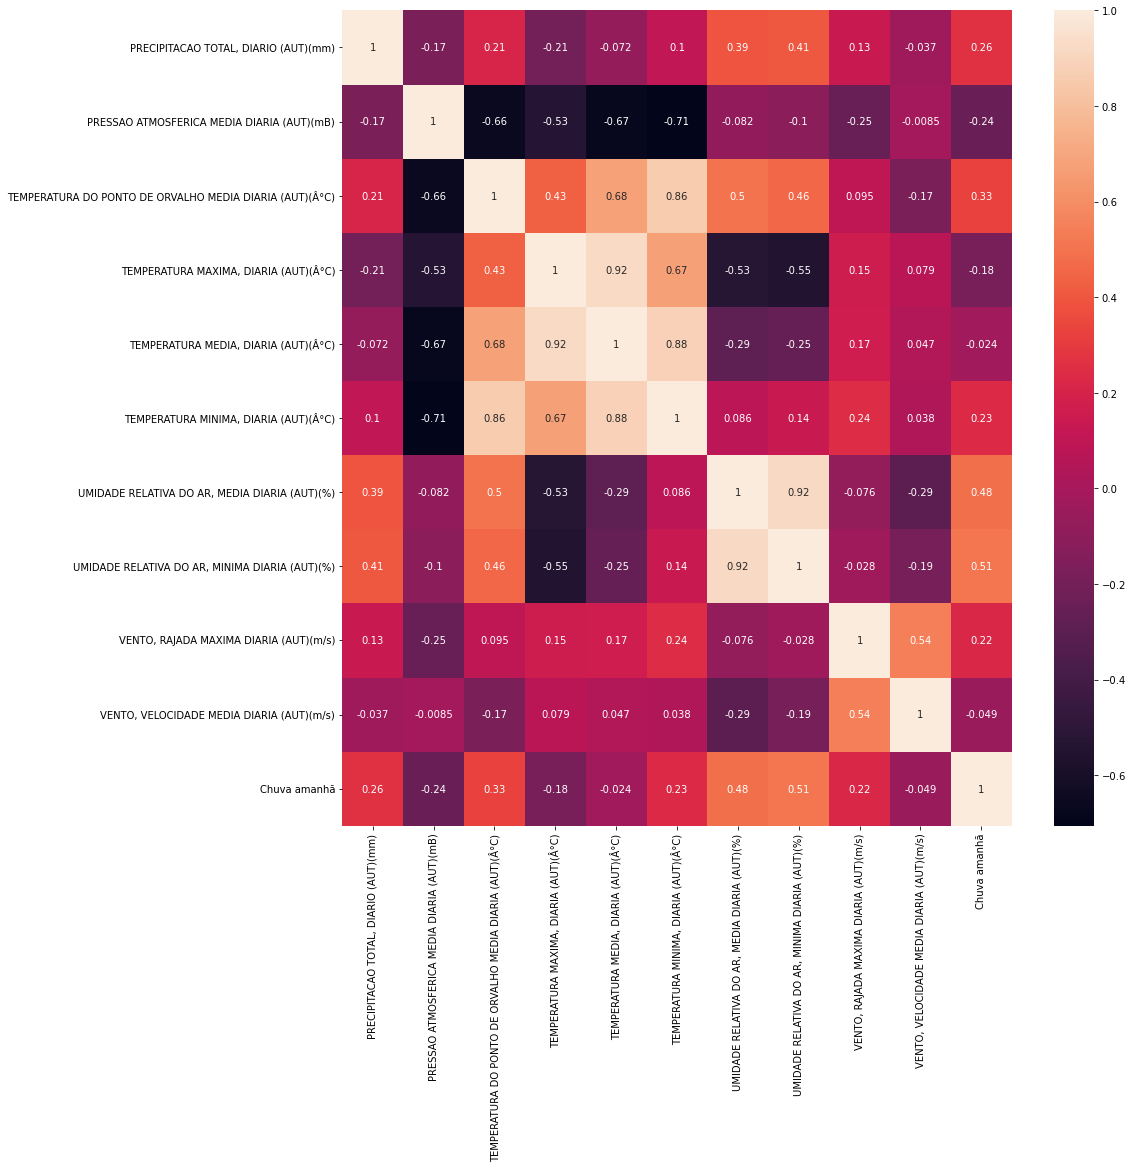

In [12]:
# Pegando o coeficiente de correlação
corr = df.corr()
plt.figure(figsize=(15,15))

# Plotando
plot = sns.heatmap(corr, annot=True)

# Transformando os dados

In [13]:
# Definindo o MinMax Scaler
scaler = MinMaxScaler()

# Transformando
col_names = list(df.columns)
data = scaler.fit_transform(df)

In [14]:
data = pd.DataFrame(data, columns=col_names)
data.head()

PRECIPITACAO TOTAL, DIARIO (AUT)(mm)  \
0                              0.042320   
1                              0.054859   
2                              0.000000   
3                              0.000000   
4                              0.000000   

   PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB)  \
0                                    0.360499   
1                                    0.416530   
2                                    0.408314   
3                                    0.361814   
4                                    0.291489   

   TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(Â°C)  \
0                                           0.849427         
1                                           0.768566         
2                                           0.761501         
3                                           0.788978         
4                                           0.758832         

   TEMPERATURA MAXIMA, DIARIA (AUT)(Â°C)  \
0                               0.601286   
1                               0.440514   
2                               0.694534   
3                               0.762058   
4                               0.836013   

   TEMPERATURA MEDIA, DIARIA (AUT)(Â°C)  \
0                              0.660360   
1                              0.548554   
2                              0.644566   
3                              0.779203   
4                              0.831118   

   TEMPERATURA MINIMA, DIARIA (AUT)(Â°C)  \
0                               0.855596   
1                               0.754513   
2                               0.602888   
3                               0.779783   
4                               0.776173   

   UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)  \
0                                       0.833432   
1                                       0.894271   
2                                       0.728884   
3                                       0.569994   
4                                       0.442410   

   UMIDADE RELATIVA DO AR, MINIMA DIARIA (AUT)(%)  \
0                                        0.666667   
1                                        0.735632   
2                                        0.436782   
3                                        0.275862   
4                                        0.252874   

   VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)  \
0                                0.289017   
1                                0.289017   
2                                0.271676   
3                                0.199422   
4                                0.248555   

   VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)  Chuva amanhã  
0                                   0.455889           1.0  
1                                   0.426323           0.0  
2                                   0.298522           0.0  
3                                   0.246066           0.0  
4                                   0.339533           0.0

# Splitting the data

In [15]:
X = data.drop(["Chuva amanhã"], axis=1)
y = data["Chuva amanhã"]

# Splitting test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3603, 10), (1545, 10), (3603,), (1545,))

# Building the model

In [16]:
previsores = X_train
classe = y_train

In [17]:
classificador = Sequential()
classificador.add(Dense(units = 32, activation = 'relu', 
                        kernel_initializer = 'normal', input_dim = 10))

classificador.add(Dropout(0.2))

classificador.add(Dense(units = 16, activation = 'relu', 
                        kernel_initializer = 'normal'))

classificador.add(Dropout(0.2))

classificador.add(Dense(units = 8, activation = 'relu', 
                        kernel_initializer = 'normal'))

classificador.add(Dropout(0.2))

classificador.add(Dense(units = 1, activation = 'sigmoid'))

otimizador = Adam(lr = 0.001, decay = 0.0001, clipvalue = 0.5)

classificador.compile(optimizer = otimizador, loss = 'binary_crossentropy',
                      metrics = ['binary_accuracy'])

classificador.fit(previsores, classe, batch_size = 10, epochs = 150)

Epoch 1/150


C:\Users\pedro\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


361/361 [==============================] - 2s 3ms/step - loss: 0.6310 - binary_accuracy: 0.6647
Epoch 2/150
361/361 [==============================] - 1s 3ms/step - loss: 0.5224 - binary_accuracy: 0.7594
Epoch 3/150
361/361 [==============================] - 1s 2ms/step - loss: 0.5079 - binary_accuracy: 0.7682
Epoch 4/150
361/361 [==============================] - 1s 2ms/step - loss: 0.4976 - binary_accuracy: 0.7721
Epoch 5/150
361/361 [==============================] - 1s 2ms/step - loss: 0.4867 - binary_accuracy: 0.7810
Epoch 6/150
361/361 [==============================] - 1s 2ms/step - loss: 0.4872 - binary_accuracy: 0.7744
Epoch 7/150
361/361 [==============================] - 1s 3ms/step - loss: 0.4794 - binary_accuracy: 0.7857
Epoch 8/150
361/361 [==============================] - 1s 2ms/step - loss: 0.4873 - binary_accuracy: 0.7807
Epoch 9/150
361/361 [==============================] - 1s 2ms/step - loss: 0.4838 - binary_accuracy: 0.7896
Epoch 10/150
361/361 [==================

# Evaluating the model

In [18]:
previsoes = classificador.predict(X_test)
previsoes = (previsoes > 0.5)
from sklearn.metrics import confusion_matrix, accuracy_score
precisao = accuracy_score(y_test, previsoes)
matriz = confusion_matrix(y_test, previsoes)

In [19]:
print(precisao, '\n', matriz )

0.8110032362459547 
 [[865 114]
 [178 388]]


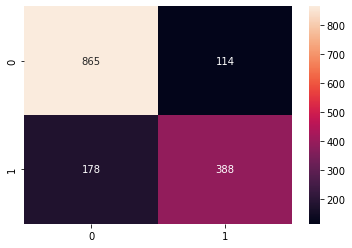

In [20]:
# plotando matriz de confusão

cm = confusion_matrix(y_test, previsoes)
f = sns.heatmap(cm, annot=True, fmt='d')

In [21]:
print(classification_report(y_test, previsoes))

              precision    recall  f1-score   support

         0.0       0.83      0.88      0.86       979
         1.0       0.77      0.69      0.73       566

    accuracy                           0.81      1545
   macro avg       0.80      0.78      0.79      1545
weighted avg       0.81      0.81      0.81      1545



In [22]:
previsoes = classificador.predict(X_test)
previsoes = pd.DataFrame(previsoes)

In [23]:
previsoes.head()

0
0  0.761406
1  0.627421
2  0.126818
3  0.061629
4  0.065566

# Saving the model

In [24]:
classificador_json = classificador.to_json()
with open('classificador_chuvabr.json', 'w') as json_file:
    json_file.write(classificador_json)
classificador.save_weights('classificador_chuvabr.h5')